In [1]:
import math, copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import cv2
# from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
image = cv2.imread('abc2.png')

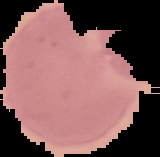

-1

In [ ]:
plt.imshow(image)
cv2.waitKey()

In [ ]:
print(image.shape)
print(image.size)
print(type(image))

(157, 160, 3)
75360
<class 'numpy.ndarray'>


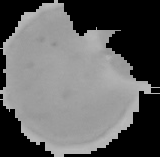

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

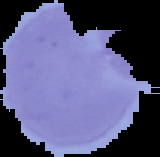

In [ ]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
cv2.imwrite('output.png', rgb, [cv2.IMWRITE_PNG_COMPRESSION])

True

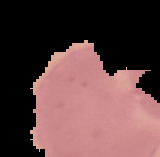

In [ ]:
num_rows, num_cols = image.shape[:2]
translation_matrix = np.float32([ [1,0,30], [0,1,40] ])
img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)
cv2_imshow(img_translation)


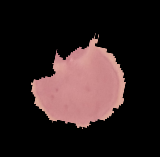

In [ ]:
img_rotation = cv2.warpAffine(image, cv2.getRotationMatrix2D((num_cols/2, num_rows/2), random.randint(0, 360), 0.6), (num_cols, num_rows))
cv2_imshow(img_rotation)

In [ ]:
def crop_image(img,tol=0):
    # img is 2D or 3D image data
    # tol  is tolerance
    mask = img>tol
    if img.ndim==3:
        mask = mask.all(2)
    mask0,mask1 = mask.any(0),mask.any(1)
    return img[np.ix_(mask0,mask1)]

def crop_image_only_outside(img,tol=0):
    # img is 2D or 3D image data
    # tol  is tolerance
    mask = img>tol
    if img.ndim==3:
        mask = mask.all(2)
    m,n = mask.shape
    mask0,mask1 = mask.any(0),mask.any(1)
    col_start,col_end = mask0.argmax(),n-mask0[::-1].argmax()
    row_start,row_end = mask1.argmax(),m-mask1[::-1].argmax()
    return img[row_start:row_end,col_start:col_end]

(157, 160, 3)


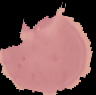

In [ ]:
print(img_rotation.shape)
img3 =crop_image(img_rotation , 0)
cv2_imshow(img3)

(157, 160, 3)


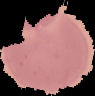

In [ ]:
# img2 = crop_image(img_rotation)
print(img_rotation.shape)
img2 =crop_image_only_outside(img_rotation , 0)
cv2_imshow(img2)

In [ ]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

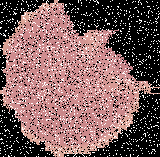

True

In [ ]:
image = cv2.imread('abc2.png') # Only for grayscale image
noise_img = sp_noise(image,0.1)
cv2_imshow(noise_img)
cv2.imwrite('sp_noise.jpg', noise_img)

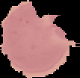

In [ ]:
img_enlarged = cv2.resize(image,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_enlarged)

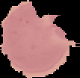

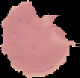

-1

In [ ]:
import cv2
import numpy as np

img = img_enlarged
cv2_imshow(img)

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss *0.01
# noisy_image2 = ((img*(1 + gauss*0.2)),0,1)

cv2_imshow(noise)
cv2.waitKey(0)

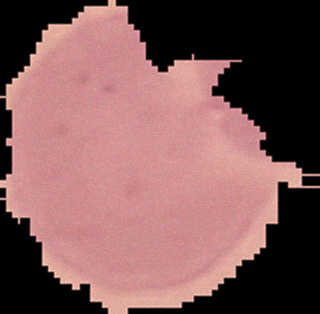

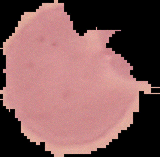

In [ ]:
cv2_imshow(noise)
img_shrink = cv2.resize(noise,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_shrink)